In [ ]:
# Install Plotly and pycountry
!pip install plotly
!pip install pycountry

# Import libraries
import pandas as pd
import plotly.express as px
from IPython.display import display

In [19]:
# Load Data
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.dropna(subset=['type', 'country', 'release_year', 'rating'], inplace=True)
df['release_year'] = df['release_year'].astype(int)

In [20]:
df_filtered = df[df['type'].isin(['Movie', 'TV Show'])]
selected_types = ['Movie', 'TV Show']  # or ['Movie'], ['TV Show']
selected_years = list(range(2010, 2021))  # Change as needed
selected_countries = ['United States', 'India', 'United Kingdom']

In [22]:
df_filtered = df[
    df['type'].isin(selected_types) &
    df['release_year'].isin(selected_years) &
    df['country'].isin(selected_countries)
]

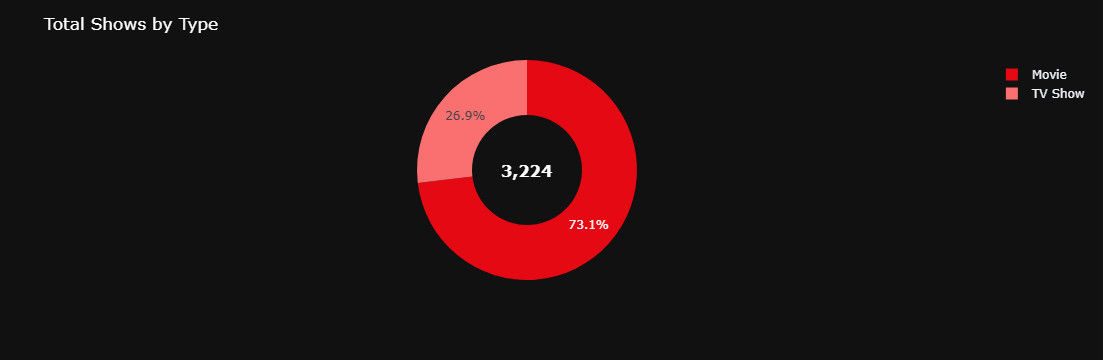

In [23]:
# Data prep
type_counts = df_filtered['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
total_shows = type_counts['Count'].sum()

# Donut chart
fig1 = px.pie(type_counts, values='Count', names='Type', hole=0.5,
             color_discrete_sequence=['#e50914', '#fa7070'])
fig1.update_layout(
    template='plotly_dark',
     title=dict(text='Total Shows by Type', x=0.04, xanchor='left', font=dict(color='white')),
    annotations=[dict(text=f"<b>{total_shows:,}</b>", x=0.5, y=0.5, showarrow=False, font=dict(size=16, color='white'))]
)

fig1.show()

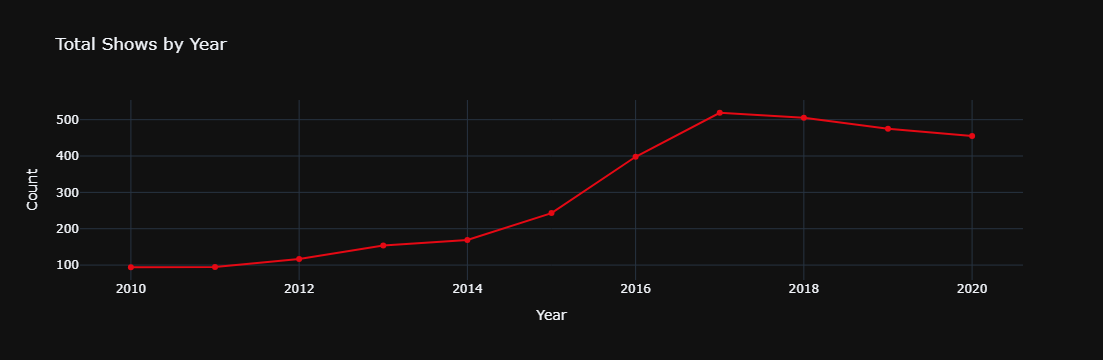

In [14]:
# total shows by year
year_counts = df_filtered['release_year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Count']
fig2 = px.line(year_counts, x='Year', y='Count', title='Total Shows by Year', markers=True)
fig2.update_traces(line_color='#e50914')
fig2.update_layout(template='plotly_dark')
fig2.show()

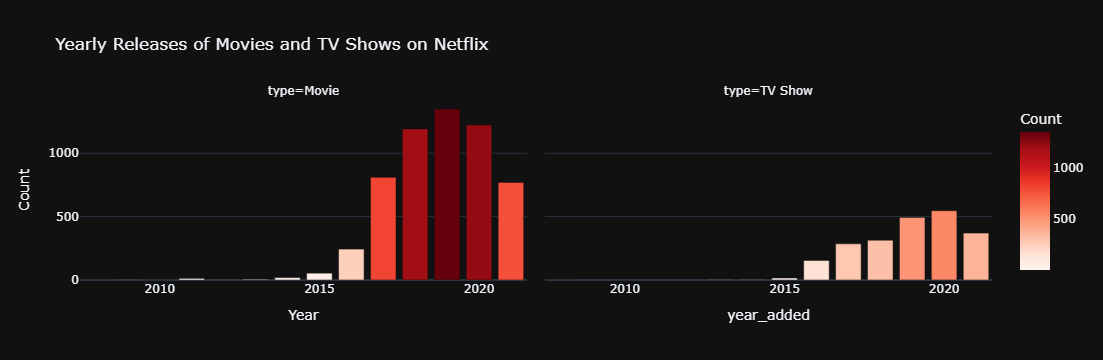

In [15]:
# Ensure date_added is datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Drop missing values
df_year = df.dropna(subset=['year_added'])

# Group by year and type
yearly_grouped = df_year.groupby(['year_added', 'type']).size().reset_index(name='Count')

# Sort by year
yearly_grouped = yearly_grouped.sort_values('year_added')

# Plot with continuous red scale based on Count
fig3 = px.bar(yearly_grouped, x='year_added', y='Count', color='Count',
                  color_continuous_scale='reds',
                  barmode='group', facet_col='type',
                  title='Yearly Releases of Movies and TV Shows on Netflix',
                  template='plotly_dark')

fig3.update_layout(xaxis_title='Year', yaxis_title='Count')
fig3.show()

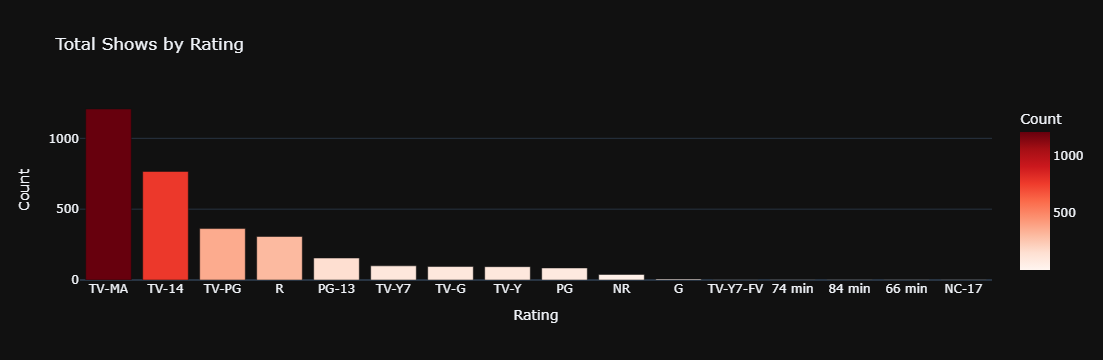

In [24]:
# Count the number of shows per rating
rating_counts = df_filtered['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']
fig4 = px.bar(rating_counts, x='Rating', y='Count', title='Total Shows by Rating',
              color='Count', color_continuous_scale='reds')
fig4.update_layout(template='plotly_dark')
fig4.show()

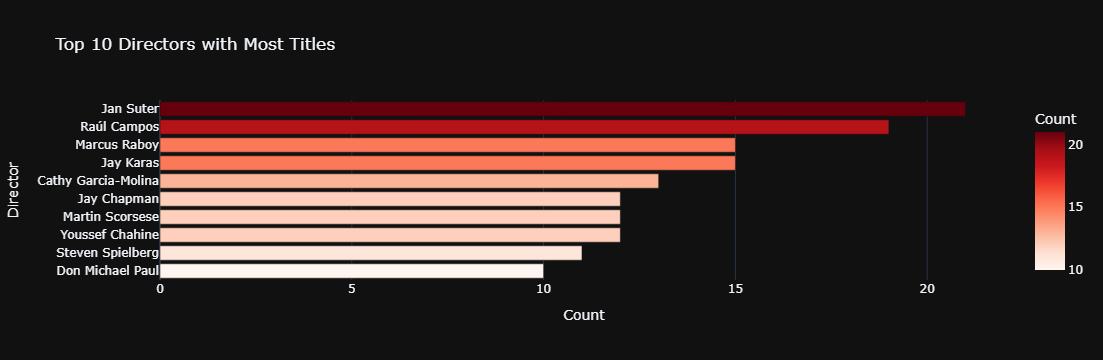

In [17]:
# Clean and preprocess
top_directors = df['director'].dropna().str.split(', ').explode()

# Remove 'Unknown' or any invalid entries
top_directors = top_directors[top_directors.str.lower() != 'unknown']

# Get top 10 directors
top_directors = top_directors.value_counts().head(10).reset_index()
top_directors.columns = ['Director', 'Count']
top_directors = top_directors.sort_values('Count', ascending=True)

# Plot
fig5 = px.bar(top_directors,
              x='Count',
              y='Director',
              orientation='h',
              color='Count',
              color_continuous_scale='reds',
              title='Top 10 Directors with Most Titles',
              template='plotly_dark')

fig5.show()

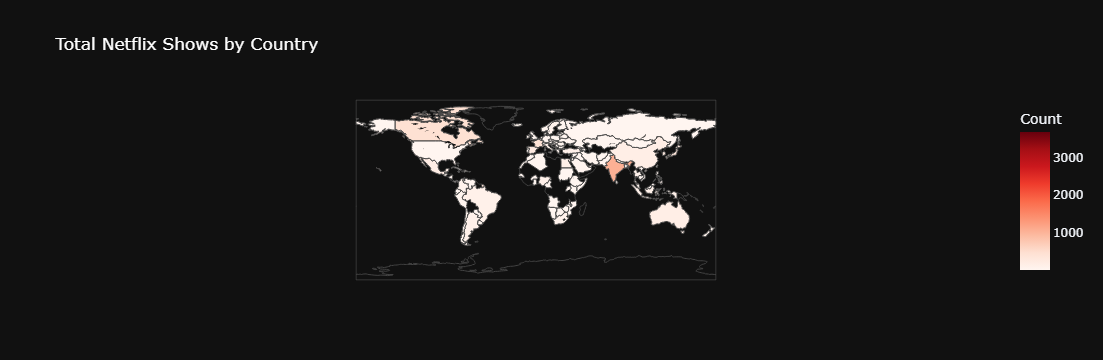

In [18]:
# Fill missing and handle multiple countries
df['country'] = df['country'].fillna('Unknown')
country_exploded = df['country'].str.split(', ').explode()

# Count total shows by country
country_counts = country_exploded.value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Remove 'Unknown' if needed
country_counts = country_counts[country_counts['Country'] != 'Unknown']

# World map visualization
fig6 = px.choropleth(country_counts,
                    locations='Country',
                    locationmode='country names',
                    color='Count',
                    color_continuous_scale='reds',
                    title='Total Netflix Shows by Country',
                    template='plotly_dark')

# Customize title style
fig6.update_layout(title_font=dict(color='white'))

fig6.show()
